# Portafolios Financieros: Maximizar el retorno esperado y minimizar el riesgo

## Importación de datos

### Librerías

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Trickers: Acciones

**Seguras (Empresas bien establecidas con un historial de crecimiento constante y estabilidad)**
- APPL: Applea
- MSFT: Microsoft
- JNJ: Johnson & Johnson
- PG: Procter & Gamble Co.
- KO: Coca-Cola Co.
- PEP: Pepsi Co.
- V: Visa Inc.
- MA: Mastercard Inc.
- WMT: Walmart Inc.
- UNH: UnitedHealth Group Inc.

**Medias (Gran capitalización con un historial probado de éxito, pero que aún tienen un alto potencial de crecimiento)**
- AMZN: Amazon Inc.
- GOOGL: Google Inc.
- META: Meta Platforms Inc.
- NFLX: Netflix Inc.
- DIS: The Walt Disney Co.
- ADBE: Adobde Inc.
- INTC: Intel Corp.
- ORCL: Oracel Corp.
- CSCO: Cisco Systems Inc.
- NVDA: NVIDIA Corp.

**Riesgosas (Tienen un alto potencial de crecimiento, pero también pueden ser muy volátiles y sensibles a los cambios del mercado)**
- TSLA: Tesla Inc.
- NIO: NIO Inc.
- PLTR: Palantir Technologies Inc.
- SNAP: Snap Inc.
- RIVN: Rivian Automotive Inc.
- COIN: Coinbase Global Inc.
- SPCE: Virgin Galactic Holdings Inc.
- DKNG: DraftKings Inc.
- HOOD: Robinhood Markets Inc.
- AMC: AMC Entertainment Holdings Inc.

In [2]:
seguras = ['AAPL', 'MSFT', 'JNJ', 'PG', 'KO', 'PEP', 'V', 'MA', 'WMT', 'UNH']
medias = ['AMZN', 'GOOGL', 'META', 'NFLX', 'DIS', 'ADBE', 'INTC', 'ORCL', 'CSCO', 'NVDA']
riesgosas = ['TSLA', 'NIO', 'PLTR', 'SNAP', 'RIVN', 'COIN', 'SPCE', 'DKNG', 'HOOD', 'AMC']

### Descarga de datos

In [3]:
tickers = seguras + medias + riesgosas

data = yf.download(tickers, period="1y", auto_adjust=False)

# Asegura que las columnas sean MultiIndex
if isinstance(data.columns, pd.MultiIndex):
    # Extrae solo la parte de 'Adj Close' para cada ticker
    historicos = data.xs('Adj Close', axis=1, level=0)
else:
    # En caso de ser solo una acción, devuelve una sola columna
    historicos = data[['Adj Close']]

[*********************100%***********************]  30 of 30 completed


## Preparación de datos

In [4]:
historicos.head()

Ticker,AAPL,ADBE,AMC,AMZN,COIN,CSCO,DIS,DKNG,GOOGL,HOOD,...,PEP,PG,PLTR,RIVN,SNAP,SPCE,TSLA,UNH,V,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2024-08-01,217.343552,546.409973,5.12,184.070007,212.639999,46.125088,92.246140,35.490002,169.936798,20.240000,...,168.810623,161.603821,26.08,15.240,12.81,6.40,216.860001,562.155334,264.010742,69.080605
2024-08-02,218.836563,526.169983,4.94,167.899994,204.440002,45.414577,88.796196,32.020000,165.856583,17.879999,...,171.782333,165.885559,24.74,14.720,9.36,6.01,207.669998,578.899170,264.656067,67.764122
2024-08-05,208.295853,509.320007,4.95,161.020004,189.470001,43.545822,87.021660,31.799999,158.482300,16.420000,...,167.922928,163.915359,24.09,14.610,8.71,5.94,198.880005,559.397400,254.589249,66.902969
2024-08-06,206.265350,514.200012,5.08,161.929993,194.169998,43.954609,89.192741,31.379999,157.526917,17.209999,...,166.427429,163.944611,26.59,14.800,8.64,5.64,200.639999,557.817139,256.396118,67.051445
2024-08-07,208.843307,513.619995,4.82,162.770004,178.910004,43.915676,85.217384,30.139999,158.173798,17.120001,...,165.751999,165.827026,26.32,13.785,8.29,5.27,191.759995,555.589233,254.668640,66.229881


### Retorno Diario Esperado

In [17]:
retorno_diario = historicos.pct_change().dropna()
retorno_diario.head()

Ticker,AAPL,ADBE,AMC,AMZN,COIN,CSCO,DIS,DKNG,GOOGL,HOOD,...,PEP,PG,PLTR,RIVN,SNAP,SPCE,TSLA,UNH,V,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2024-08-02,0.006869,-0.037042,-0.035156,-0.087847,-0.038563,-0.015404,-0.037399,-0.097774,-0.024010,-0.116601,...,0.017604,0.026495,-0.051380,-0.034121,-0.269321,-0.060937,-0.042378,0.029785,0.002444,-0.019057
2024-08-05,-0.048167,-0.032024,0.002024,-0.040977,-0.073224,-0.041149,-0.019984,-0.006871,-0.044462,-0.081655,...,-0.022467,-0.011877,-0.026273,-0.007473,-0.069444,-0.011647,-0.042327,-0.033688,-0.038037,-0.012708
2024-08-06,-0.009748,0.009581,0.026263,0.005651,0.024806,0.009388,0.024949,-0.013208,-0.006028,0.048112,...,-0.008906,0.000178,0.103778,0.013005,-0.008037,-0.050505,0.008850,-0.002825,0.007097,0.002219
2024-08-07,0.012498,-0.001128,-0.051181,0.005187,-0.078591,-0.000886,-0.044570,-0.039516,0.004106,-0.005229,...,-0.004058,0.011482,-0.010154,-0.068581,-0.040509,-0.065603,-0.044258,-0.003994,-0.006738,-0.012253
2024-08-08,0.016633,0.032359,0.053942,0.018615,0.074954,0.015736,0.000000,0.013271,0.019441,0.035631,...,0.003376,0.004999,0.112462,0.067827,0.078408,0.140418,0.036921,0.000283,0.012903,0.011209


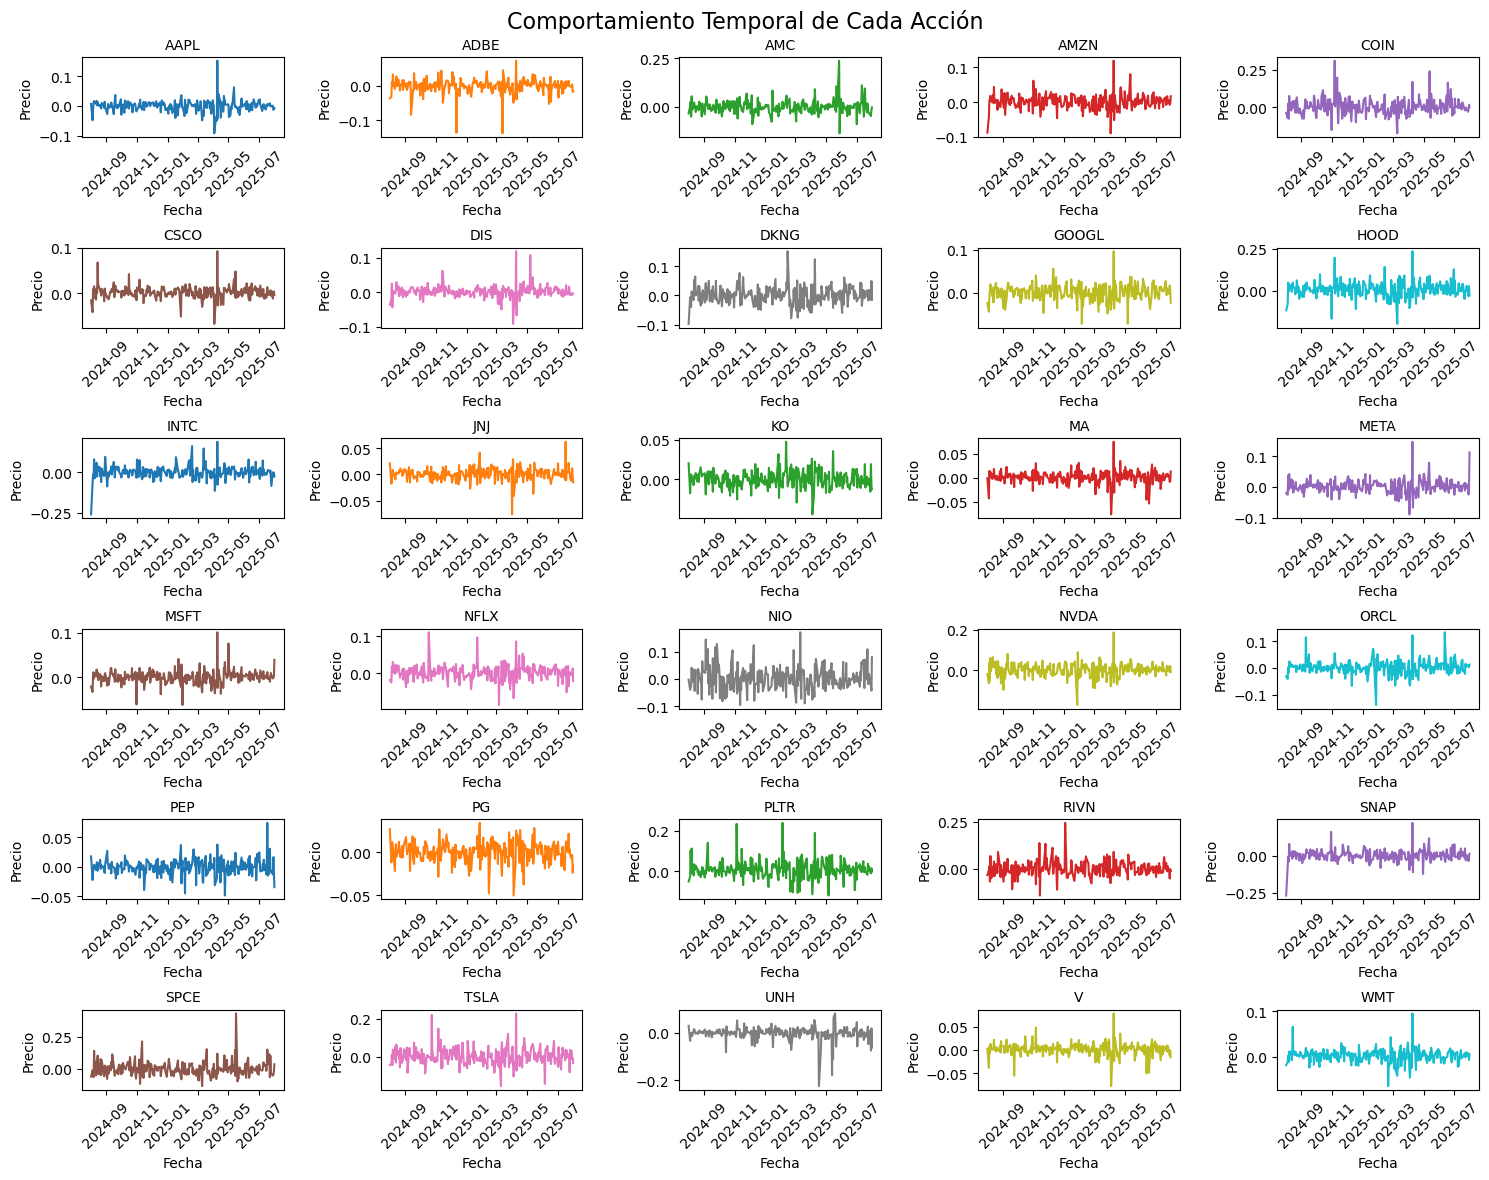

In [ ]:
fig, ax = plt.subplots(6, 5, figsize=(15, 12))
ax = ax.flat
num_col = retorno_diario.columns

for i, col in enumerate(num_col):
    ax[i].plot(retorno_diario.index, retorno_diario[col], 
               color=(list(plt.rcParams['axes.prop_cycle']) * 7)[i]['color'])
    ax[i].set_title(col, fontsize=10)
    ax[i].tick_params(axis='x', labelrotation=45)
    ax[i].set_xlabel("Fecha")
    ax[i].set_ylabel("Precio")

fig.tight_layout()
fig.subplots_adjust(top=0.94)
fig.suptitle('Comportamiento Temporal de Cada Acción', fontsize=16)
plt.show()

### Retorno Promedio Esperado (RENDIMIENTO)

In [6]:
retorno_promedio_esperado = retorno_diario.mean()
retorno_promedio_esperado_anual = retorno_diario.mean() * 249

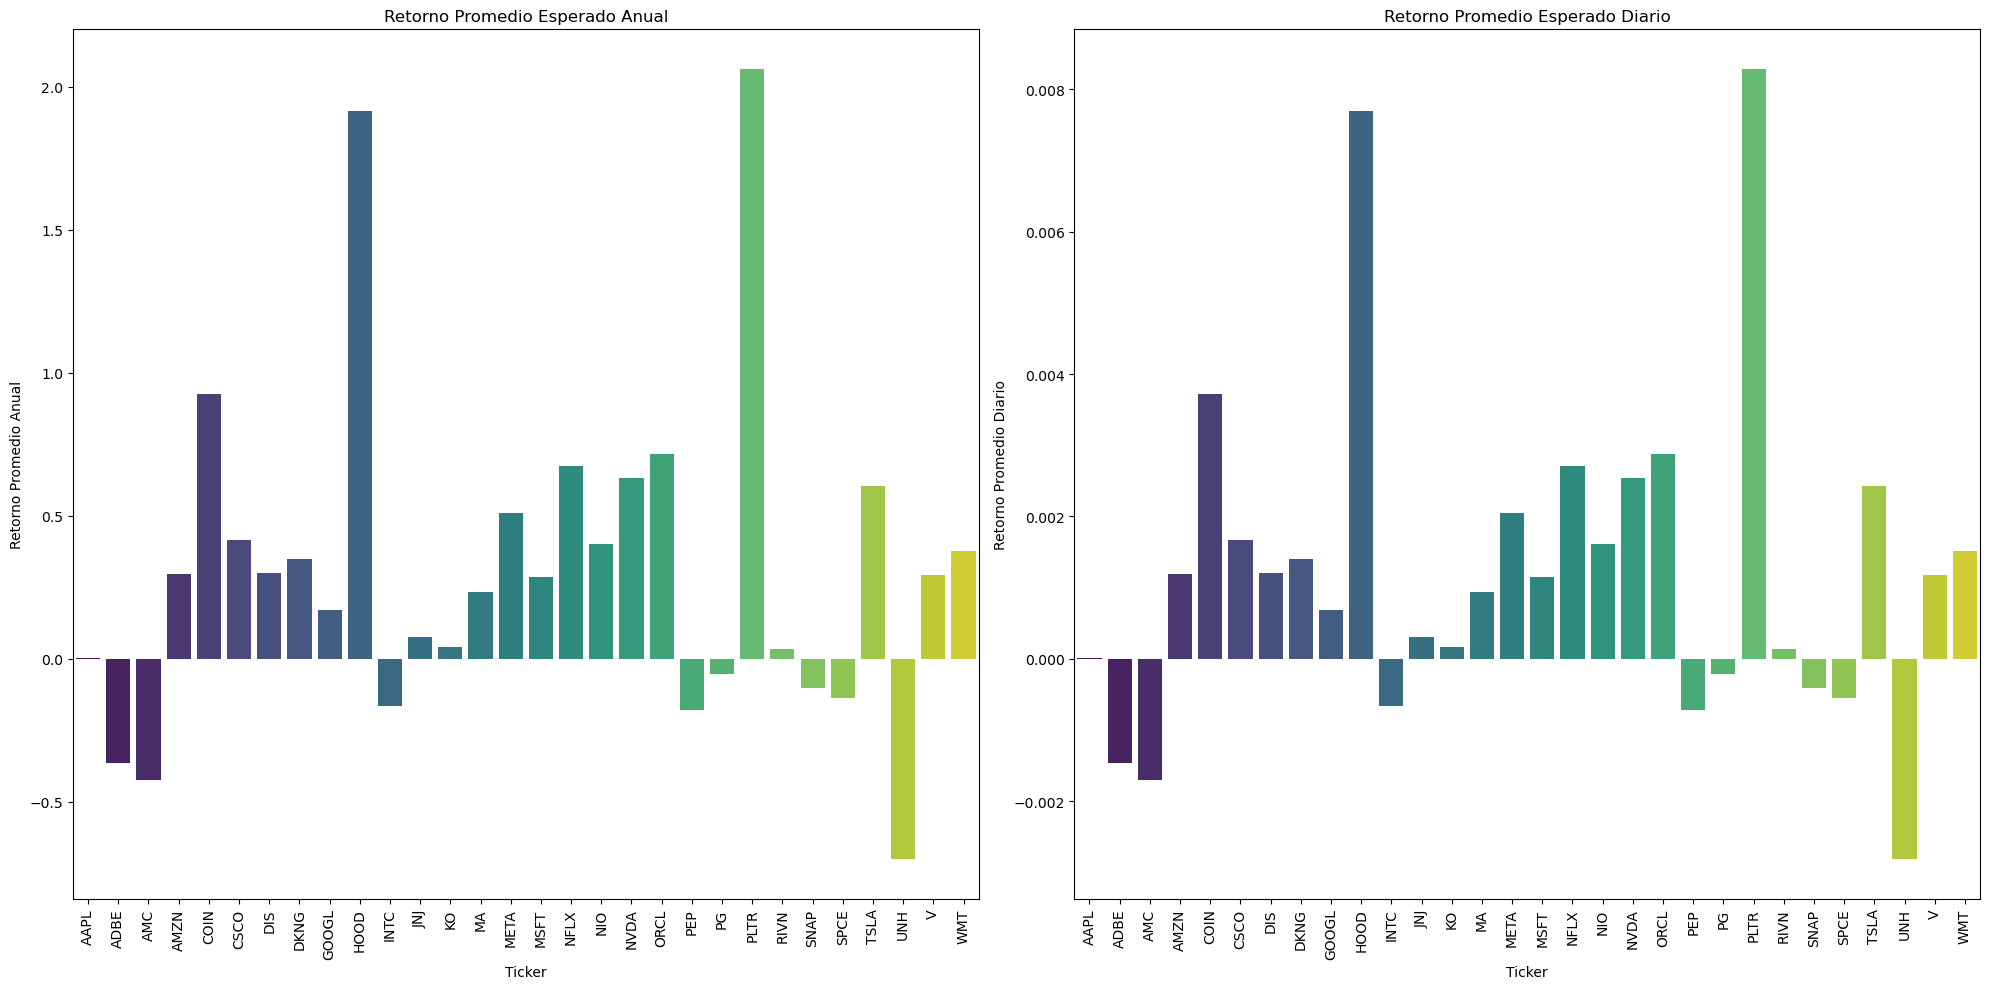

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

sns.barplot(x=retorno_promedio_esperado_anual.index, y=retorno_promedio_esperado_anual.values, ax=ax1, palette='viridis', hue=retorno_promedio_esperado_anual.index)
ax1.set_title('Retorno Promedio Esperado Anual')
ax1.set_xlabel('Ticker')
ax1.set_ylabel('Retorno Promedio Anual')
ax1.tick_params(axis='x', rotation=90)

sns.barplot(x=retorno_promedio_esperado.index, y=retorno_promedio_esperado.values, ax=ax2, palette='viridis', hue=retorno_promedio_esperado.index)
ax2.set_title('Retorno Promedio Esperado Diario')
ax2.set_xlabel('Ticker')
ax2.set_ylabel('Retorno Promedio Diario')
ax2.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

### Matriz de Covarianza

In [ ]:
matriz_covarianza = retorno_diario.cov()

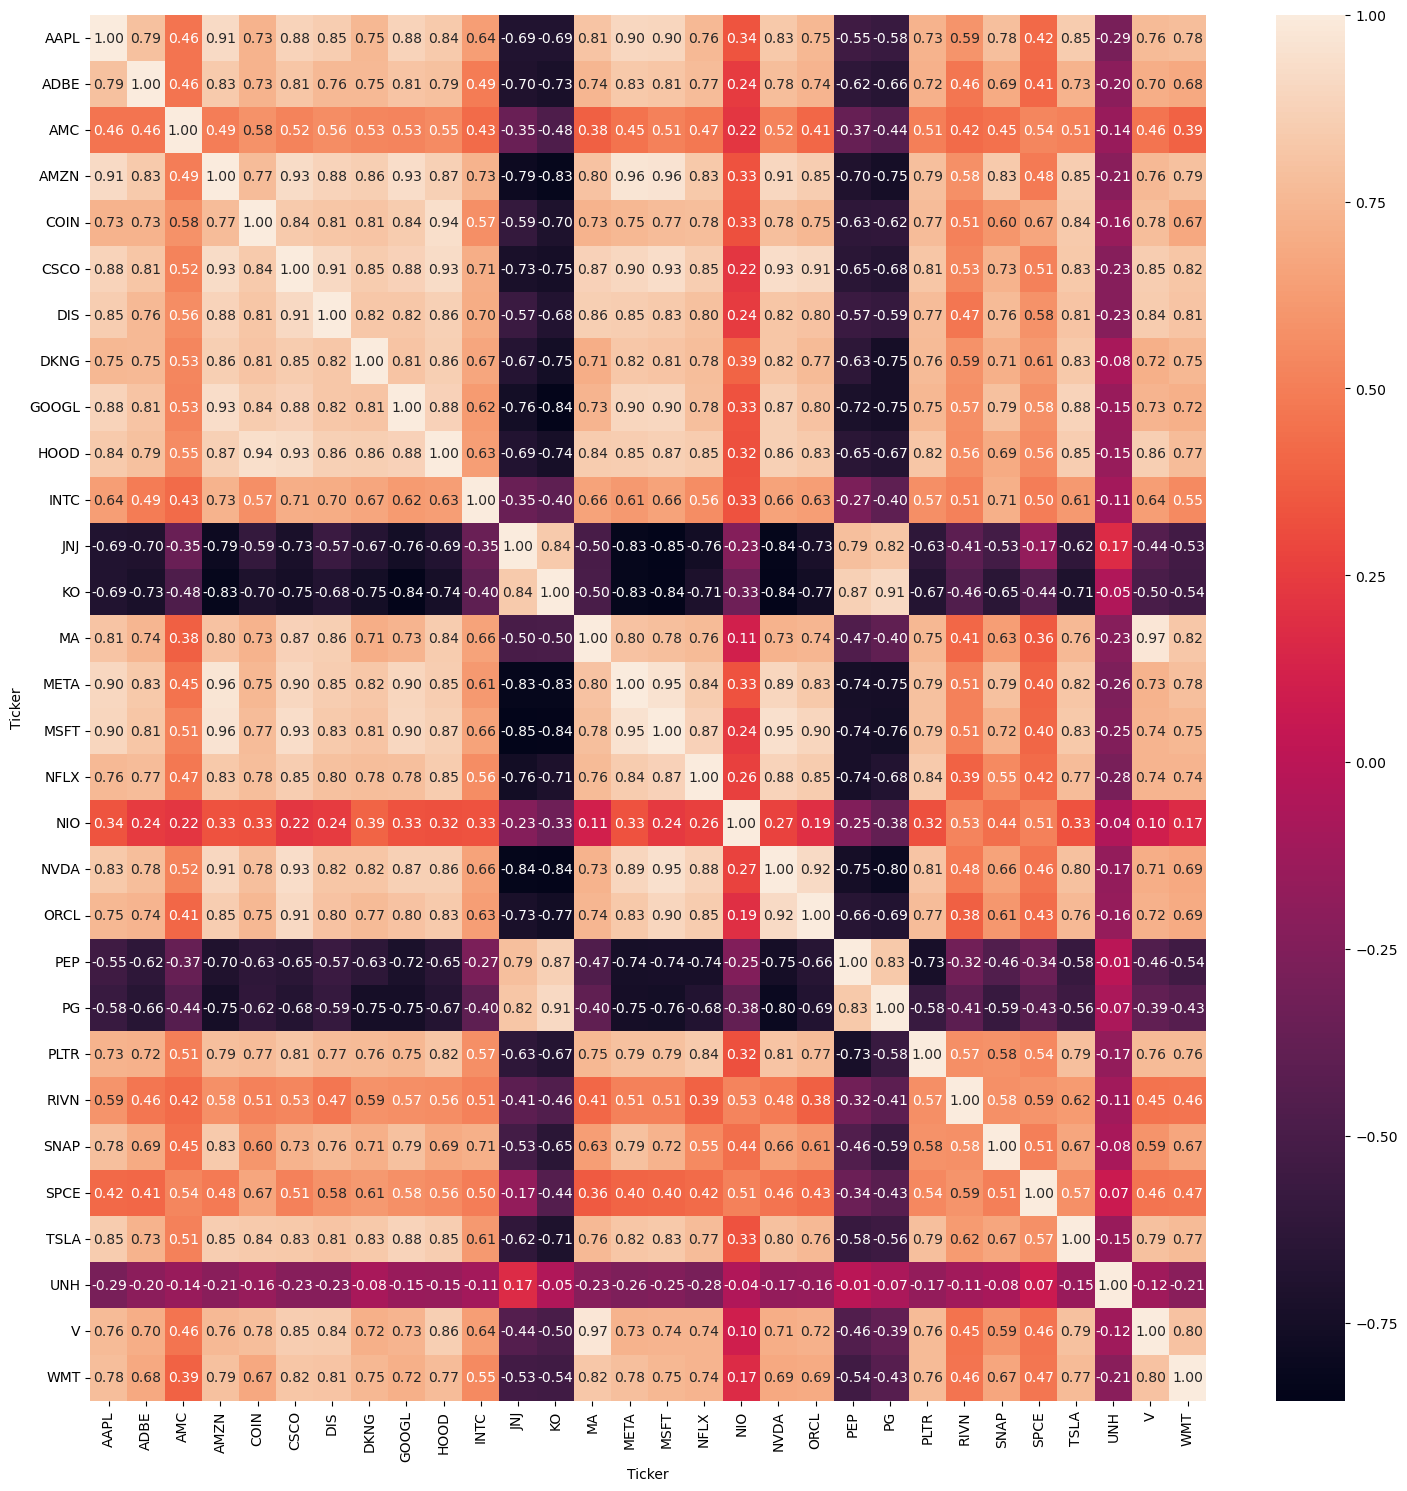

In [9]:
plt.figure(figsize=(18,18))
sns.heatmap(data = matriz_covarianza.corr(numeric_only=True), annot=True, fmt='.2f')
plt.show()

### Riesgo Individual de las acciones

In [19]:
riesgo_individual = retorno_diario.std()
riesgo_individual_anual = riesgo_individual * (249 ** 0.5)

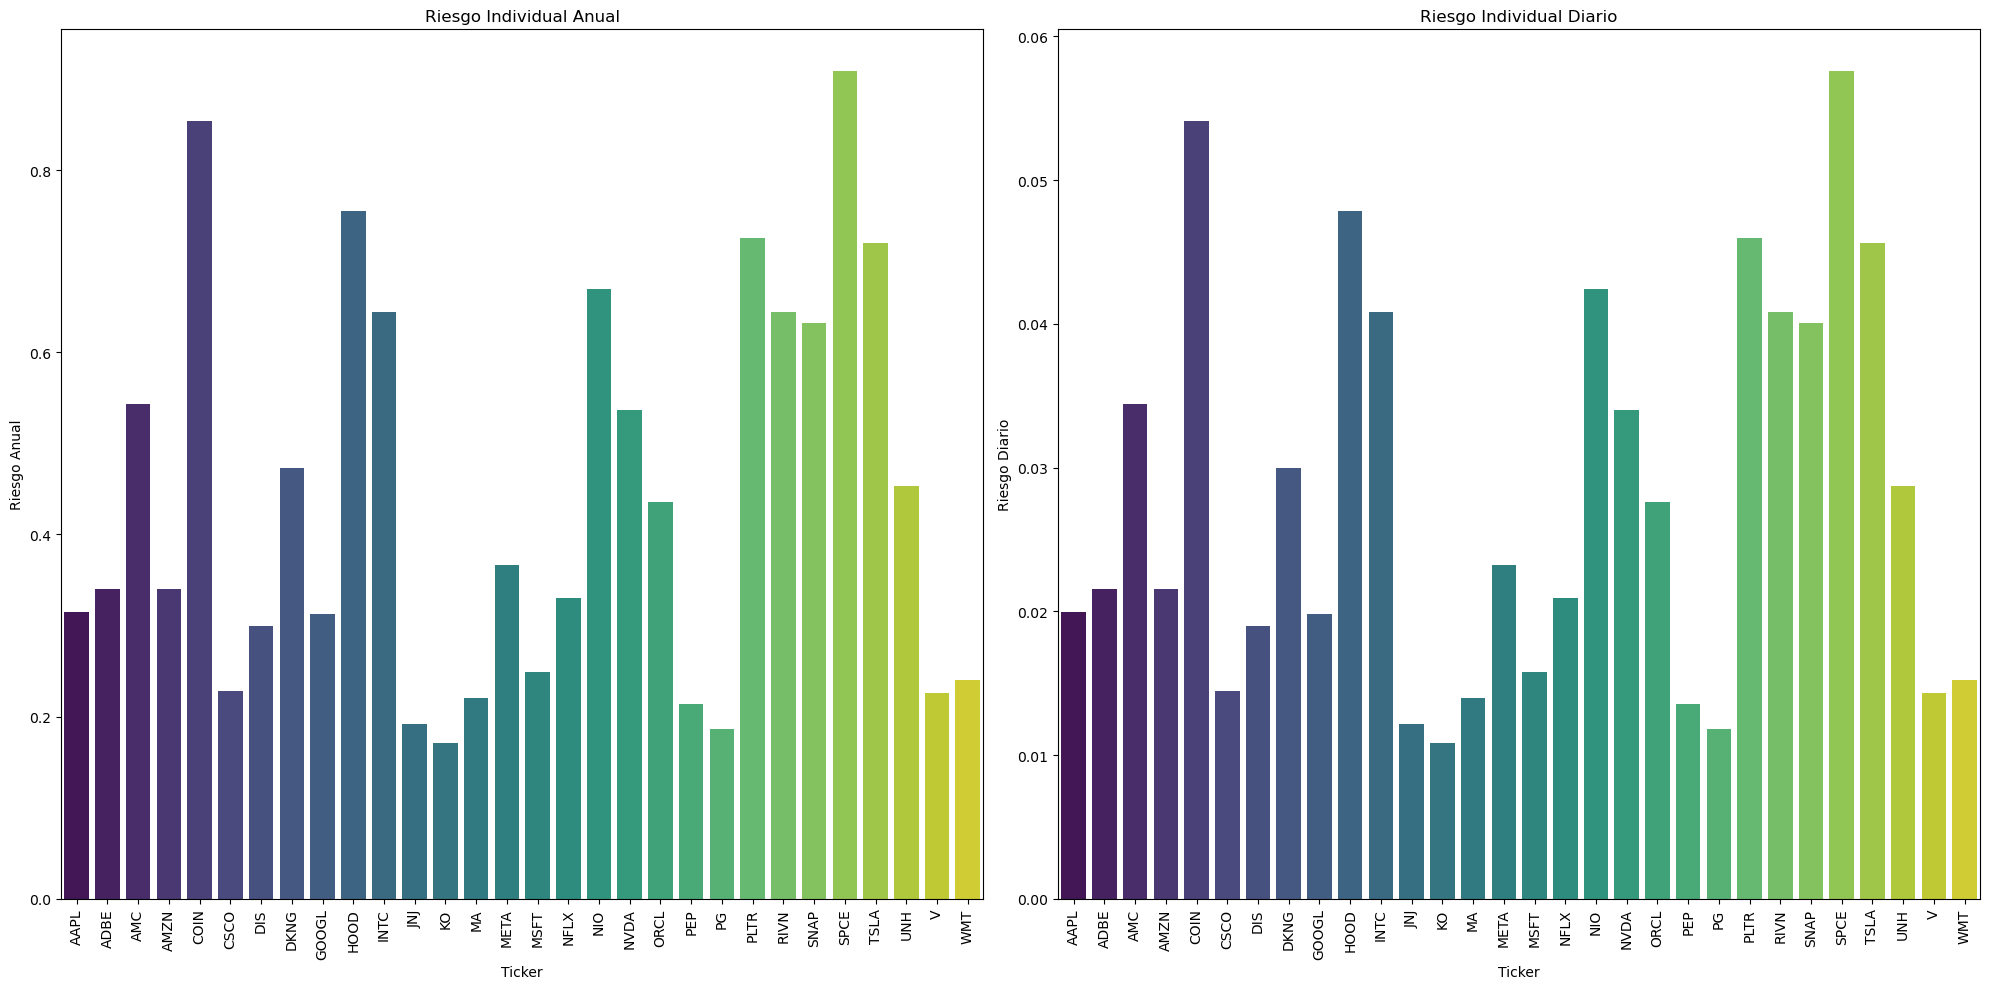

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

sns.barplot(x=riesgo_individual_anual.index, y=riesgo_individual_anual.values, ax=ax1, palette='viridis', hue=riesgo_individual_anual.index)
ax1.set_title('Riesgo Individual Anual')
ax1.set_xlabel('Ticker')
ax1.set_ylabel('Riesgo Anual')
ax1.tick_params(axis='x', rotation=90)

sns.barplot(x=riesgo_individual.index, y=riesgo_individual.values, ax=ax2, palette='viridis', hue=riesgo_individual.index)
ax2.set_title('Riesgo Individual Diario')
ax2.set_xlabel('Ticker')
ax2.set_ylabel('Riesgo Diario')
ax2.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

## Generación de Portafolio